# AST 7939 Homework Assignment #1 (10 pts)

## All work is due Wednesday February 8 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and add comments to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where $D = 1, 2, 5, 10, 100,$ and $1000$. Each array contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [2]:
# Make sure to add comments saying what you are doing
ele = int(10**4) # number of elements 
arr_1d = np.random.rand(ele, 1) # each element gets one value to go with it

In [13]:
arr_2d = np.random.rand(ele, 2) # each element gets two values to go with it

In [ ]:
arr_5d = np.random.rand(ele, 5) # each element has 5 attributes

In [ ]:
arr_10d = np.random.rand(ele, 10) # each element has 10 attributes

In [ ]:
arr_1000d = np.random.rand(ele, 1000) # each element has 1000 attributes

(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. There could be faster ways to do this computation, but I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [3]:
# Find the distance using distance_matrix and then divide by the square root of the dimension
# Normalize them by the maximum possible distance in each hypercube np.sqrt(D)
dist_1d = distance_matrix(arr_1d, arr_1d) / np.sqrt(1)

In [14]:
dist_2d = distance_matrix(arr_2d, arr_2d) / np.sqrt(2)

In [ ]:
dist_5d = distance_matrix(arr_5d, arr_5d) / np.sqrt(5)

In [ ]:
dist_10d = distance_matrix(arr_10d, arr_10d) / np.sqrt(10)

In [ ]:
dist_1000d = distance_matrix(arr_1000d, arr_1000d) / np.sqrt(1000)

(c) In a single figure, plot six histograms (one for each array) showing the number of counts on the y axis vs. normalized distance between data points on the x axis. Make sure that your figure is readble. Also, label them properly so that readers can understand what the figure shows. (1 pt)


In [17]:
# Plot a histogram for each dimension. Make sure to label the plots and make them pretty
hist_1d, bins_1d = np.histogram(dist_1d)

In [ ]:
hist_2d, bins_2d = np.histogram(dist_2d)

In [ ]:
hist_5d, bins_5d = np.histogram(dist_2d)

In [ ]:
hist_10d, bins_10d = np.histogram(dist_2d)

In [ ]:
hist_1000d, bins_2d = np.histogram(dist_2d)

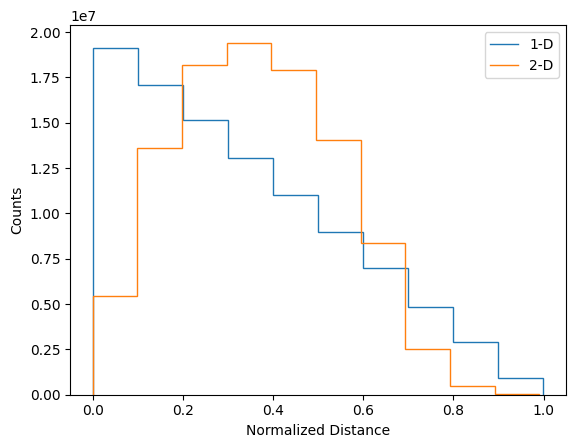

In [19]:
plt.stairs(hist_1d, bins_1d, label='1-D')
plt.stairs(hist_2d, bins_2d, label='2-D')





plt.xlabel('Normalized Distance')
plt.ylabel('Counts')
plt.legend()

(d) Discuss what you see in the figure in the context of kNN. (1 pt)

## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

SDSS.csv contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Read in the data. Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [ ]:
# subtract the magnitudes to get the colors








(b) Make kNN models. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? Use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features -- so you have a 10-dimensional dataset. (1 pt)

In [ ]:
# Just like in class. Remember to normalize!!! 10-dimensional space








(c) Make DT models. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? Again, use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features.(1 pt)

In [ ]:
# Vary max depth from 1-30, same as in class








(d) For your best decision tree model, which features are the most important? (1 pt)

In [ ]:
# Like the bar chart from class








(e) SDSS_evaluation.csv contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [ ]:
# 








(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused the poor performace. (1 pt)

In [ ]:
# The accuracy should be bad. Why? 






